In [6]:
import scipy.io

# Connect to Quantum Inspire QI using TOKEN file.
import models.connect_quantum_inspire as qi_tools
import models.quantum_state_circuits as qs_circuits
import importlib
import numpy as np
import matplotlib.pyplot as plt

importlib.reload(qi_tools)
importlib.reload(qs_circuits)

QI = qi_tools.connect_qi('../TOKEN')
qi_backend = QI.get_backend('QX single-node simulator')

# Quantum State Circuits

In [7]:
theta_vals = np.linspace(0, np.pi, 15)
phi_vals = np.zeros_like(theta_vals)
measurement_directions = np.array([theta_vals, phi_vals, theta_vals, phi_vals])

In [8]:
# Regenerating Figure 6 from J. Brody and G. Guzman, "Calculating spin correlations with a quantum computer", doi: 10.1119/10.0001967
# Get Expectation value for singlet state
circuit, q,b = qs_circuits.create_entangled_singlet()
circuit.barrier()
expectation_list_singlet = qs_circuits.measure_circuit_directions(circuit, q, b, measurement_directions, qi_backend, shots=512)

# Get Expectation value for triplet state
circuit, q,b = qs_circuits.create_entangled_triplet()
circuit.barrier()
expectation_list_triplet = qs_circuits.measure_circuit_directions(circuit, q, b, measurement_directions, qi_backend, shots=512)

# Get Expectation value for product state |00>
circuit, q,b = qs_circuits.create_product_state(0)
circuit.barrier()
expectation_list_product0 = qs_circuits.measure_circuit_directions(circuit, q, b, measurement_directions, qi_backend, shots=512)

# Get Expectation value for product state |11>
circuit, q,b = qs_circuits.create_product_state(1)
circuit.barrier()
expectation_list_product1 = qs_circuits.measure_circuit_directions(circuit, q, b, measurement_directions, qi_backend, shots=512)

The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run

7771268


The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run

7771268


The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run

7771268


The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run

7771268


In [12]:
def prob_hits_to_error(results_probs):
  spin = np.array([-(sum(map(int, list(each))) % 2 * 2 - 1) for each in results_probs.keys()]).reshape(4,1)
  probs = np.array(list(results_probs.values()))
  # standard_deviation = sqrt mean_of_squares - mean^2
  exp = np.sum(spin*probs, axis=0)
  exp_sq = np.sum(spin**2*probs, axis=0)
  variance = exp_sq - exp**2
  
  return spin, probs, exp, exp_sq, variance

In [ ]:
qi_backendstar = QI.get_backend('Starmon-5')
# Get Expectation value for product state |11>
circuit, q,b = qs_circuits.create_product_state(1)
circuit.barrier()
expectation_list_product1star = qs_circuits.measure_circuit_directions(circuit, q, b, measurement_directions, qi_backendstar, shots=512)

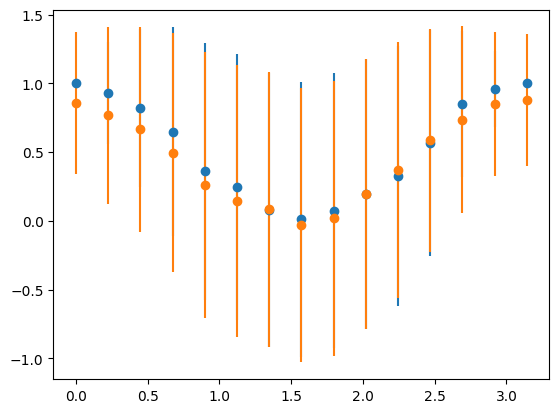

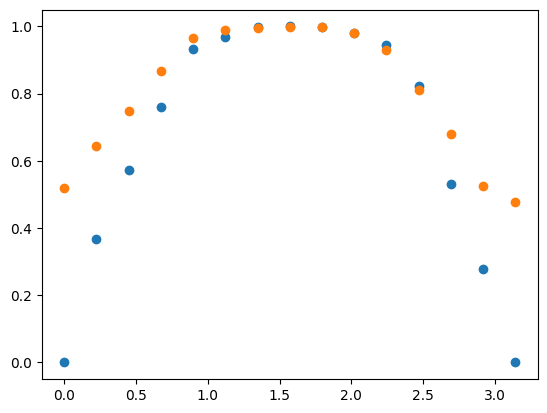

In [70]:
for each in [expectation_list_product1, expectation_list_product1star]:
    spin, probs, exp, exp_sq, variance = prob_hits_to_error(each[1])
    plt.errorbar(theta_vals, exp, yerr=np.sqrt(variance), fmt='o')
plt.show()

for each in [expectation_list_product1, expectation_list_product1star]:
    spin, probs, exp, exp_sq, variance = prob_hits_to_error(each[1])
    plt.scatter(theta_vals, np.sqrt(variance),)
plt.show()

In [14]:
qi_backendstar = QI.get_backend('Starmon-5')
circuit, q,b = qs_circuits.create_entangled_singlet()
circuit.barrier()
expectation_list_singletstar2 = qs_circuits.measure_circuit_directions(circuit, q, b, measurement_directions, qi_backendstar, shots=512)

circuit, q,b = qs_circuits.create_entangled_triplet()
circuit.barrier()
expectation_list_tripletstar = qs_circuits.measure_circuit_directions(circuit, q, b, measurement_directions, qi_backendstar, shots=512)

circuit, q,b = qs_circuits.create_product_state(0)
circuit.barrier()
expectation_list_product0star = qs_circuits.measure_circuit_directions(circuit, q, b, measurement_directions, qi_backendstar, shots=512)

circuit, q,b = qs_circuits.create_product_state(1)
circuit.barrier()
expectation_list_product1star = qs_circuits.measure_circuit_directions(circuit, q, b, measurement_directions, qi_backendstar, shots=512)

7771268
7771268
7771268
7771268


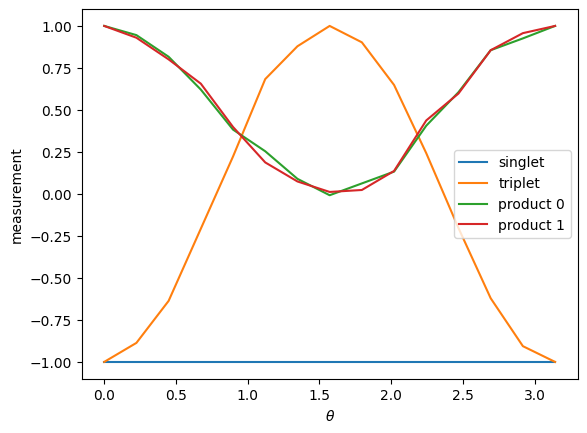

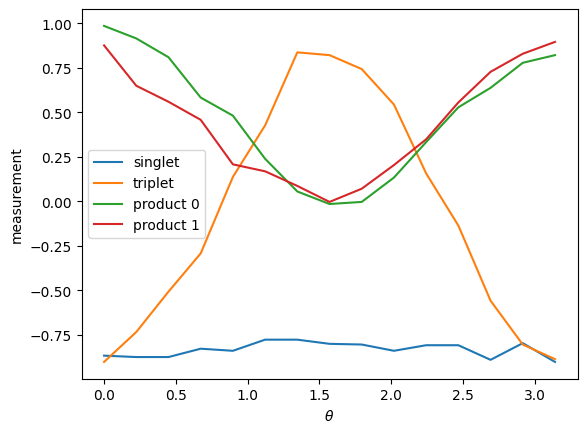

In [18]:
plt.plot(theta_vals, np.array([expectation_list_singlet[0], expectation_list_triplet[0], expectation_list_product0[0],expectation_list_product1[0]]).T)
plt.xlabel("$\\theta$")
plt.ylabel("measurement")
plt.legend(['singlet', 'triplet', 'product 0', 'product 1'])
plt.show()

plt.plot(theta_vals, np.array([expectation_list_singletstar2[0], expectation_list_tripletstar[0], expectation_list_product0star[0],expectation_list_product1star[0]]).T)
plt.xlabel("$\\theta$")
plt.ylabel("measurement")
plt.legend(['singlet', 'triplet', 'product 0', 'product 1'])
plt.show()

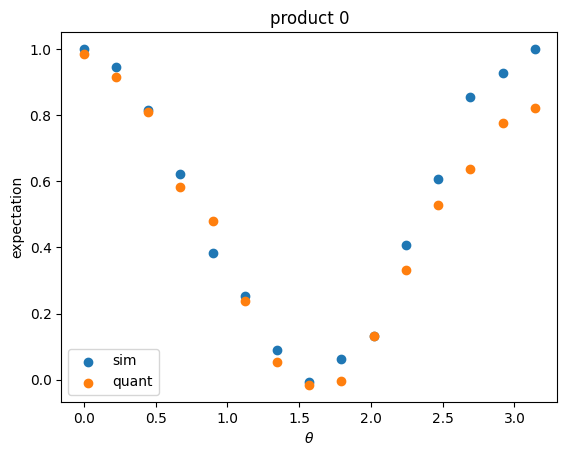

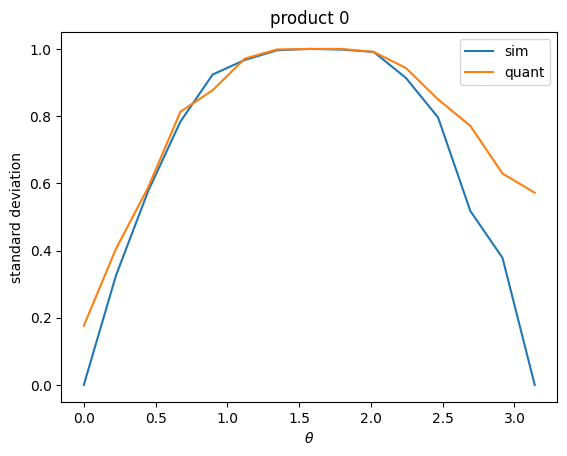

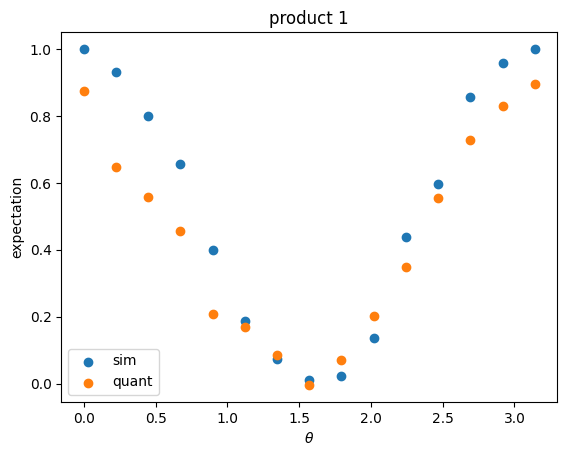

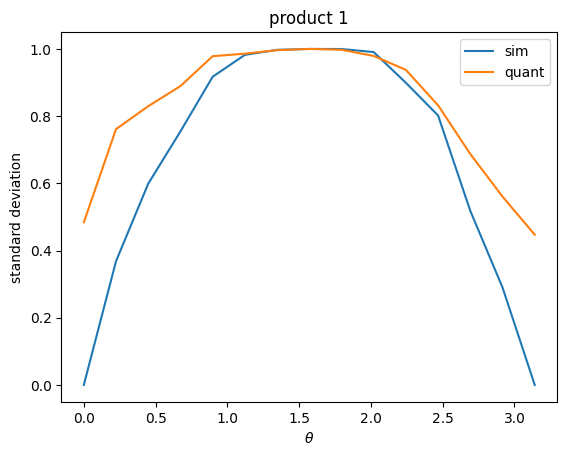

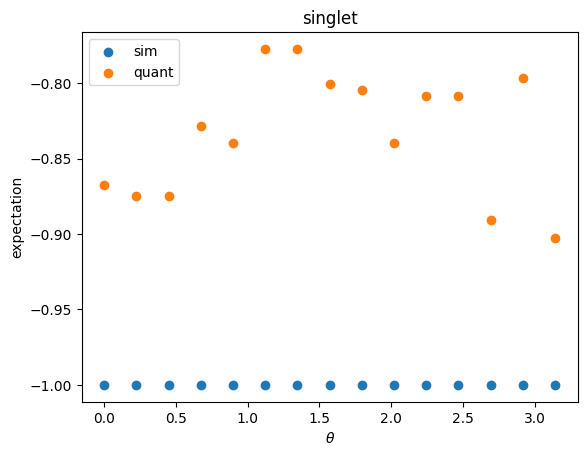

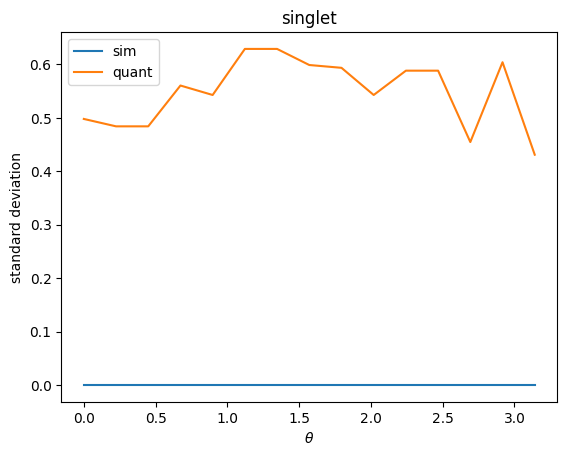

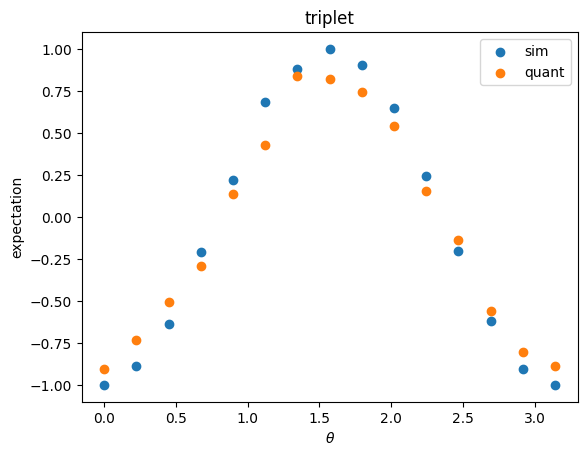

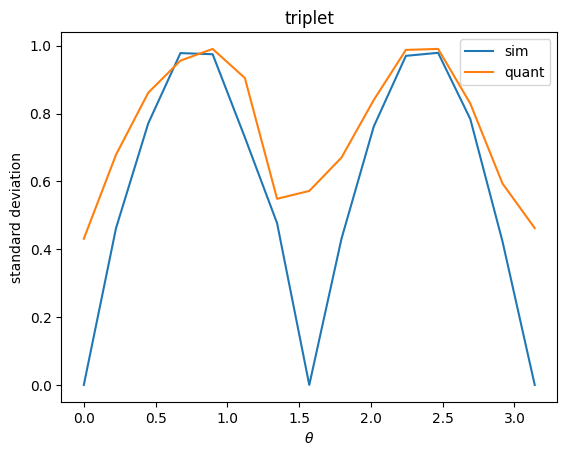

In [28]:
titles = ['product 0', 'product 1', 'singlet', 'triplet']
for sim, quant in zip([expectation_list_product0, expectation_list_product1, expectation_list_singlet, expectation_list_triplet],
                      [expectation_list_product0star, expectation_list_product1star, expectation_list_singletstar2,expectation_list_tripletstar]):
    
    _, _, exps, _, variances = prob_hits_to_error(sim[1])
    _, _, expq, _, varianceq = prob_hits_to_error(quant[1])
    plt.scatter(theta_vals, exps, label='sim')
    plt.scatter(theta_vals, expq, label='quant')
    plt.xlabel('$\\theta$')
    plt.ylabel('expectation')
    title = titles.pop(0)
    plt.title(title)
    plt.legend()
    plt.show()
    plt.plot(theta_vals, np.sqrt(variances), label='sim')
    plt.plot(theta_vals, np.sqrt(varianceq), label='quant')
    plt.xlabel('$\\theta$')
    plt.ylabel('standard deviation')
    plt.title(title)
    plt.legend()
    plt.show()

In [46]:
# Output results to csv
import pandas as pd
import scipy.io as sio


data = np.array([theta_vals, expectation_list_singlet[0], expectation_list_triplet[0], expectation_list_product0[0],expectation_list_product1[0]]).T
df = pd.DataFrame(data, columns=['theta', 'singlet', 'triplet', 'product 0', 'product 1'])
df.to_csv('expectations_sim.csv')
sio.savemat('expectations_sim.mat', {'data':data})

# for quantum data (star)
data = np.array([theta_vals, expectation_list_singletstar2[0], expectation_list_tripletstar[0], expectation_list_product0star[0],expectation_list_product1star[0]]).T
df = pd.DataFrame(data, columns=['theta', 'singlet', 'triplet', 'product 0', 'product 1'])
df.to_csv('expectations_quant.csv')
sio.savemat('expectations_quant.mat', {'data':data})

titles = ['singlet', 'triplet','product 0', 'product 1', ]
# Output raw data to csv
for each in [expectation_list_singlet, expectation_list_triplet, expectation_list_product0,expectation_list_product1]:
    data = np.array(list(each[1].values())).T
    df = pd.DataFrame(data, columns=list(each[1].keys()))
    name = titles.pop(0)
    df.to_csv('full_data_quant_{}.csv'.format(name))
    sio.savemat('full_data_quant_{}.mat'.format(name), {'data':data})
    
titles = ['singlet', 'triplet','product 0', 'product 1', ]
# Output raw data to csv
for each in [expectation_list_singletstar2, expectation_list_tripletstar, expectation_list_product0star,expectation_list_product1star]:
    data = np.array(list(each[1].values())).T
    df = pd.DataFrame(np.array(list(each[1].values())).T, columns=list(each[1].keys()))
    name = titles.pop(0)
    df.to_csv('full_data_quant_{}.csv'.format(name))
    sio.savemat('full_data_quant_{}.mat'.format(name), {'data':data})

In [39]:
list(each[1].values())

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0.517578125,
  0.505859375,
  0.509765625,
  0.5234375,
  0.5,
  0.509765625,
  0.5234375,
  0.49609375,
  0.484375,
  0.525390625,
  0.50390625,
  0.49609375,
  0.4921875,
  0.490234375,
  0.484375],
 [0.482421875,
  0.494140625,
  0.490234375,
  0.4765625,
  0.5,
  0.490234375,
  0.4765625,
  0.50390625,
  0.515625,
  0.474609375,
  0.49609375,
  0.50390625,
  0.5078125,
  0.509765625,
  0.515625],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

In [ ]:
def generate_expectation_values(delay=0, shots=1000):
    # a b
    theta_vals = np.zeros((30))
    theta2_vals = np.linspace(0, np.pi, 30)
    phi_vals=np.zeros_like(theta_vals)
    
    ab_measurement_directions = np.array([theta_vals, phi_vals, theta2_vals, phi_vals])
    abp_measurement_directions = np.array([theta_vals, phi_vals, theta2_vals+np.pi/2, phi_vals])
    apb_measurement_directions = np.array([theta_vals+np.pi/2, phi_vals, theta2_vals, phi_vals])
    apbp_measurement_directions = np.array([theta_vals+np.pi/2, phi_vals, theta2_vals+np.pi/2, phi_vals])
    
    circuit, q, b = qs_circuits.create_entangled_singlet()
    circuit.barrier()
    if delay > 0:
        circuit.delay(delay)
        
    expectation_list_singlet_ab, resab = measure_circuit_correlation(circuit, q, b, ab_measurement_directions, shots=shots)
    expectation_list_singlet_abp, resabp = measure_circuit_correlation(circuit, q, b, abp_measurement_directions, shots=shots)
    expectation_list_singlet_apb, resapb = measure_circuit_correlation(circuit, q, b, apb_measurement_directions, shots=shots)
    expectation_list_singlet_apbp, resapbp = measure_circuit_correlation(circuit, q, b, apbp_measurement_directions, shots=shots)
    
    return expectation_list_singlet_ab, expectation_list_singlet_abp, expectation_list_singlet_apb, expectation_list_singlet_apbp,\
           resab, resabp, resapb, resapbp

In [11]:
eab, eabp, eapb, eapbp, resab, resabp, resapb, resapbp = generate_expectation_values(delay=0, shots=200)

The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run

ValueError: not enough values to unpack (expected 8, got 4)

Text(0, 0.5, 'S?')

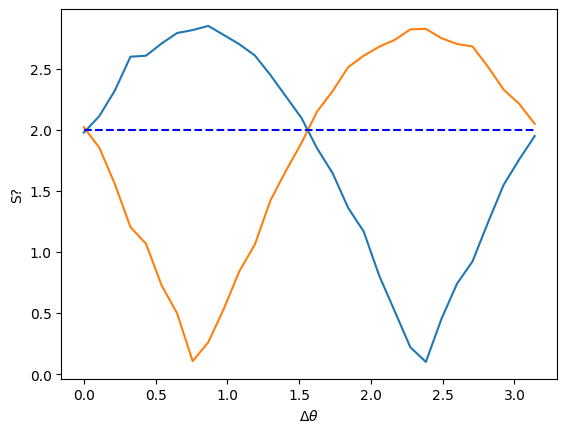

In [8]:
## Plot Bells Inequality
# |E(a,b)-E(a,b')|+|E(a',b')+E(a',b)| <= 2
plt.plot(np.linspace(0,np.pi,30), np.abs(np.array(eab)-np.array(eabp))+np.abs(np.array(eapbp)+np.array(eapb)))
# |E(a,b)+E(a,b')|+|E(a',b')-E(a',b)| <= 2
plt.plot(np.linspace(0,np.pi,30), np.abs(np.array(eab)+np.array(eabp))+np.abs(np.array(eapbp)-np.array(eapb)))
# Plot blue dotted line at y=2 to show violation of Bell's inequality for singlet state, i.e. first inequality
plt.plot(np.linspace(0,np.pi,30), np.ones_like(np.linspace(0,np.pi,30))*2, 'blue', linestyle='--')

plt.xlabel('$\\Delta \\theta$')
plt.ylabel('S?')

In [9]:
##
eabd, eabpd, eapbd, eapbpd = generate_expectation_values(delay=10, shots=1000)


The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run on backend QX single-node simulator.
The backend for which the project was created is different from the backend type given: QX single-node simulator. The experiment is run

Text(0, 0.5, 'S?')

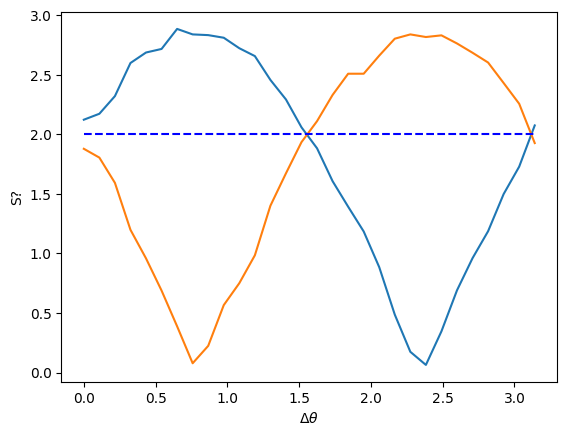

In [10]:
## Plot Bells Inequality
# |E(a,b)-E(a,b')|+|E(a',b')+E(a',b)| <= 2
plt.plot(np.linspace(0,np.pi,30), np.abs(np.array(eabd)-np.array(eabpd))+np.abs(np.array(eapbpd)+np.array(eapbd)))
# |E(a,b)+E(a,b')|+|E(a',b')-E(a',b)| <= 2
plt.plot(np.linspace(0,np.pi,30), np.abs(np.array(eabd)+np.array(eabpd))+np.abs(np.array(eapbpd)-np.array(eapbd)))
# Plot blue dotted line at y=2 to show violation of Bell's inequality for singlet state, i.e. first inequality
plt.plot(np.linspace(0,np.pi,30), np.ones_like(np.linspace(0,np.pi,30))*2, 'blue', linestyle='--')

plt.xlabel('$\\Delta \\theta$')
plt.ylabel('S?')

In [ ]:
## Plot Bells Inequality

plt.plot(np.linspace(0,np.pi,30), np.array(expectation_list_singlet_ab))
plt.plot(np.linspace(0,np.pi,30), np.array(expectation_list_singlet_abp))
plt.plot(np.linspace(0,np.pi,30), np.array(expectation_list_singlet_apb))
plt.plot(np.linspace(0,np.pi,30), np.array(expectation_list_singlet_apbp))

plt.xlabel('$\\Delta \\theta$') 